# UK Covid-19 cases

Quick and dirty EDA on data downloaded from https://coronavirus.data.gov.uk

In [1]:
import pandas as pd

%matplotlib inline

### Read data

In [2]:
df = pd.read_csv('coronavirus-cases_latest.csv',
                 parse_dates=['Specimen date']
                )\
.rename(columns=lambda x: x.replace(' ', '_'))

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Area_name                             28645 non-null  object        
 1   Area_code                             28645 non-null  object        
 2   Area_type                             28645 non-null  object        
 3   Specimen_date                         28645 non-null  datetime64[ns]
 4   Daily_lab-confirmed_cases             28641 non-null  float64       
 5   Previously_reported_daily_cases       97 non-null     float64       
 6   Change_in_daily_cases                 97 non-null     float64       
 7   Cumulative_lab-confirmed_cases        28645 non-null  int64         
 8   Previously_reported_cumulative_cases  97 non-null     float64       
 9   Change_in_cumulative_cases            97 non-null     float64       
 10

,Area_name,Area_code,Area_type,Specimen_date,Daily_lab-confirmed_cases,Previously_reported_daily_cases,Change_in_daily_cases,Cumulative_lab-confirmed_cases,Previously_reported_cumulative_cases,Change_in_cumulative_cases,Cumulative_lab-confirmed_cases_rate
0,England,E92000001,Nation,2020-05-15,55.0,0.0,55.0,142523,141387.0,1136.0,254.6
1,South West,E12000009,Region,2020-05-15,2.0,NaN,NaN,7266,NaN,NaN,129.8
2,South East,E12000008,Region,2020-05-15,2.0,NaN,NaN,20071,NaN,NaN,219.7
3,London,E12000007,Region,2020-05-15,0.0,NaN,NaN,26359,NaN,NaN,295.9
4,East of England,E12000006,Region,2020-05-15,4.0,NaN,NaN,12972,NaN,NaN,209.2


### Daily lab confirmed cases for England only

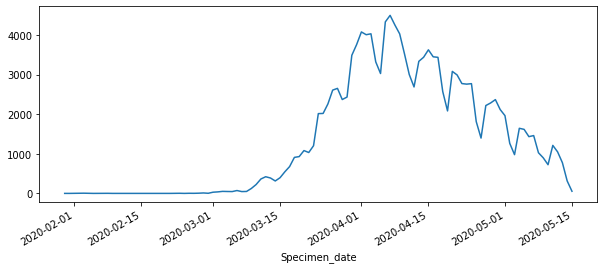

In [3]:
df\
.query('Area_name == "England"')\
.set_index('Specimen_date')\
['Daily_lab-confirmed_cases']\
.plot(figsize=(10,4));

### Cumulative lab confirmed cases for England only

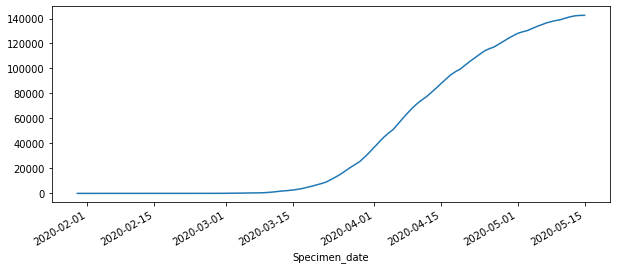

In [4]:
df\
.query('Area_name == "England"')\
.set_index('Specimen_date')\
['Cumulative_lab-confirmed_cases']\
.plot(figsize=(10,4));

### Area types

In [5]:
df['Area_type'].value_counts()

Lower tier local authority    18199
Upper tier local authority     9633
Region                          716
Nation                           97
Name: Area_type, dtype: int64

### Area names for Regions

Regions have between 73 and 86 days data as of 2020-05-15, as records are omitted where there are no cases.

In [6]:
df.query('Area_type == "Region"')['Area_name'].value_counts()

London                      86
South East                  86
East Midlands               81
Yorkshire and The Humber    80
West Midlands               78
South West                  78
North West                  77
East of England             77
North East                  73
Name: Area_name, dtype: int64

### Pivot the data for regions

Get `Daily_lab-confirmed_cases` & `Cumulative_lab-confirmed_cases`.

In [7]:
cases_by_region_df = df\
.query('Area_type == "Region"')\
.pivot(index='Specimen_date', columns='Area_name', values=['Daily_lab-confirmed_cases', 'Cumulative_lab-confirmed_cases'])

cases_by_region_df.info()
cases_by_region_df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2020-01-30 to 2020-05-15
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   (Daily_lab-confirmed_cases, East Midlands)                  81 non-null     float64
 1   (Daily_lab-confirmed_cases, East of England)                77 non-null     float64
 2   (Daily_lab-confirmed_cases, London)                         86 non-null     float64
 3   (Daily_lab-confirmed_cases, North East)                     73 non-null     float64
 4   (Daily_lab-confirmed_cases, North West)                     77 non-null     float64
 5   (Daily_lab-confirmed_cases, South East)                     86 non-null     float64
 6   (Daily_lab-confirmed_cases, South West)                     78 non-null     float64
 7   (Daily_lab-confirmed_cases, West Midlands)                  78 non-null

Daily_lab-confirmed_cases                                    \
Area_name                 East Midlands East of England London North East   
Specimen_date                                                               
2020-05-11                        103.0           131.0   61.0       85.0   
2020-05-12                         84.0           113.0   75.0       86.0   
2020-05-13                         73.0            53.0   70.0       59.0   
2020-05-14                         43.0            11.0   16.0       27.0   
2020-05-15                          6.0             4.0    0.0        0.0   

                                                              \
Area_name     North West South East South West West Midlands   
Specimen_date                                                  
2020-05-11         258.0      172.0       57.0         149.0   
2020-05-12         201.0      155.0       25.0         130.0   
2020-05-13         170.0      119.0       36.0          79.0   
2020-05-14          41.0       24.0       23.0          42.0   
2020-05-15           3.0        2.0        2.0           4.0   

                                       Cumulative_lab-confirmed_cases  \
Area_name     Yorkshire and The Humber                  East Midlands   
Specimen_date                                                           
2020-05-11                       161.0                         8020.0   
2020-05-12                       134.0                         8104.0   
2020-05-13                        79.0                         8177.0   
2020-05-14                        76.0                         8220.0   
2020-05-15                        28.0                         8226.0   

                                                                         \
Area_name     East of England   London North East North West South East   
Specimen_date                                                             
2020-05-11            12791.0  26198.0     9324.0    23061.0    19771.0   
2020-05-12            12904.0  26273.0     9410.0    23262.0    19926.0   
2020-05-13            12957.0  26343.0     9469.0    23432.0    20045.0   
2020-05-14            12968.0  26359.0     9496.0    23473.0    20069.0   
2020-05-15            12972.0  26359.0     9496.0    23476.0    20071.0   

                                                                 
Area_name     South West West Midlands Yorkshire and The Humber  
Specimen_date                                                    
2020-05-11        7180.0       15377.0                  12750.0  
2020-05-12        7205.0       15507.0                  12884.0  
2020-05-13        7241.0       15586.0                  12963.0  
2020-05-14        7264.0       15628.0                  13039.0  
2020-05-15        7266.0       15632.0                  13067.0

### Daily lab confirmed cases for all English regions

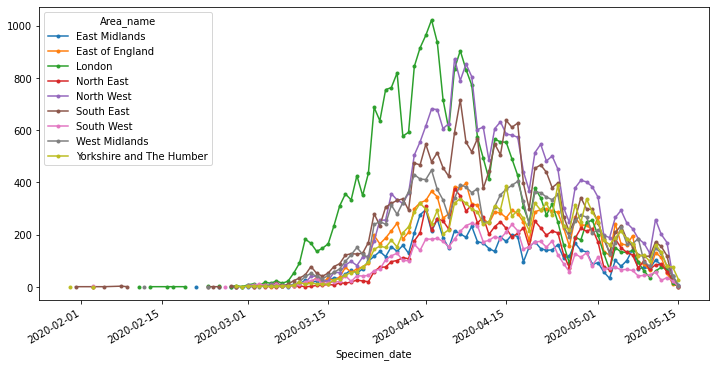

In [8]:
cases_by_region_df['Daily_lab-confirmed_cases'].plot(figsize=(12,6), style='.-');

### Cumulative lab confirmed cases for all English regions

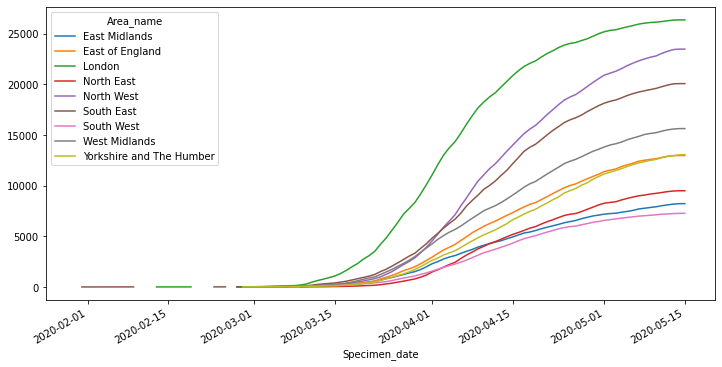

In [9]:
cases_by_region_df['Cumulative_lab-confirmed_cases'].plot(figsize=(12,6));